# Simple Linear Regression

This Notebook is divided into three parts:

1. Building Linear Regression Model using sklearn
2. Building the model like a Pro using sklearn!!
3. Model Building using statsmodels

In [39]:
import warnings
warnings.filterwarnings('ignore')

## Building Linear Regression Model using sklearn

Below mentioned are the steps to be followed:

1. Load the data
2. Data Preparation - train-test Split, Normalisation or Rescaling
3. Training the Model
4. Prediction
5. Evaluation

### 1. Load the data 

In [40]:
# Importing the required libraries

import pandas as pd
import numpy as np

In [41]:
df = pd.read_csv('student_scores.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [42]:
df.shape

(25, 2)

### 2. Data Preparation 

In [22]:
from sklearn.preprocessing import StandardScaler
num_features = ['Hours', 'Scores']
standardized_data = StandardScaler().fit_transform(df)
print(standardized_data.shape)

(25, 2)


In [23]:
print(type(standardized_data))

<class 'numpy.ndarray'>


In [24]:
print(standardized_data)

[[-1.01532822 -1.23022337]
 [ 0.03556882 -0.18082023]
 [-0.7323944  -0.98805342]
 [ 1.40981881  0.94930623]
 [-0.61113705 -0.86696844]
 [-1.4195194  -1.27058503]
 [ 1.69275263  1.4740078 ]
 [ 0.19724529  0.34388134]
 [ 1.32898057  1.19147618]
 [-0.93448999 -1.06877674]
 [ 1.08646587  1.35292282]
 [ 0.35892176  0.42460466]
 [-0.20694588 -0.42299019]
 [-0.69197529 -0.38262853]
 [-1.58119586 -1.39167001]
 [ 1.57149528  1.75653941]
 [-1.01532822 -0.86696844]
 [-1.25784293 -1.1091384 ]
 [ 0.43975999  0.62641295]
 [ 0.96520852  0.70713627]
 [-0.93448999 -0.86696844]
 [-0.08568853  0.10171138]
 [-0.4898797  -0.66516014]
 [ 0.76311293  0.98966788]
 [ 1.12688499  1.39328448]]


In [25]:
df = pd.DataFrame(standardized_data, columns = num_features)
df.head()

,Hours,Scores
0,-1.015328,-1.230223
1,0.035569,-0.180820
2,-0.732394,-0.988053
3,1.409819,0.949306
4,-0.611137,-0.866968


In [26]:
target = df['Scores']
data = df[['Hours']]

In [27]:
data

,Hours
0,-1.015328
1,0.035569
2,-0.732394
3,1.409819
4,-0.611137
5,-1.419519
6,1.692753
7,0.197245
8,1.328981
9,-0.934490


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, train_size=0.7, \
                                                    random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17, 1) (17,)
(8, 1) (8,)


In [29]:
X_train.head()

,Hours
23,0.763113
14,-1.581196
1,0.035569
10,1.086466
13,-0.691975


In [30]:
X_test.head()

,Hours
5,-1.419519
2,-0.732394
19,0.965209
16,-1.015328
11,0.358922


### 3. Training the model 

In [32]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [33]:
print('y intercept: ',regressor.intercept_)
print('slope: ',regressor.coef_)

y intercept:  -0.0019732162822435895
slope:  [0.97746517]


### 4. Prediction

In [34]:
y_test_pred = regressor.predict(X_test)

In [35]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
temp_df

,Actual,Predicted
5,-1.270585,-1.389504
2,-0.988053,-0.717863
19,0.707136,0.941484
16,-0.866968,-0.994421
11,0.424605,0.348860
22,-0.665160,-0.480814
17,-1.109138,-1.231471
24,1.393284,1.099518


### 5. Evaluation

In [36]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  0.17838754769261284
Mean Squared Error:  0.03741160247184391
Root Mean Squared Error:  0.19342079120881475


In [37]:
print(metrics.r2_score(y_test, y_test_pred))

0.9568211104435258


## Building the model like a Pro using sklearn!!

Below mentioned are the steps to be followed:

1. Load the data
2. Understand and Viz the data
3. Data Preparation - train-test Split, Normalisation or Rescaling
4. Training the Model
5. Residual Analysis on Training Data
6. Prediction
7. Evaluation

### 1. Loading the Data

In [43]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df = pd.read_csv('student_scores.csv')

## 2. Understanding and Visuallizing the data

In [45]:
df.shape

(25, 2)

In [46]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [47]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [48]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

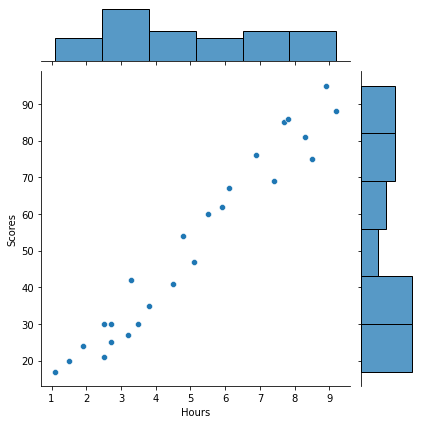

In [49]:
sns.jointplot(x='Hours', y='Scores', data=df, kind = 'scatter')

In [50]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<AxesSubplot:>

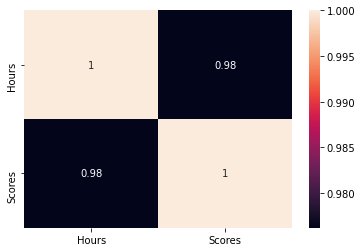

In [51]:
plt.figure()
sns.heatmap(df.corr(), annot = True)

## 3. Data Preparation

1. Splitting df into train and test
2. Rescaling the variables (Normalisation and Standardisation)
- Interpretability improves
- Model trains fast

In [52]:
# Train test split

from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, train_size=0.7, \
                                                    random_state=0)

print(df_train.shape)
print(df_test.shape)

(17, 2)
(8, 2)


In [53]:
df_train.head()

,Hours,Scores
23,6.9,76
14,1.1,17
1,5.1,47
10,7.7,85
13,3.3,42


In [54]:
from sklearn.preprocessing import MinMaxScaler

rescale = MinMaxScaler()

num_features = ['Hours', 'Scores']

norm_train_data = rescale.fit_transform(df_train.loc[:,num_features])

print(norm_train_data.shape, type(norm_train_data))

(17, 2) <class 'numpy.ndarray'>


In [55]:
df_train = pd.DataFrame(norm_train_data, columns = num_features)

df_train.head()

,Hours,Scores
0,0.716049,0.756410
1,0.000000,0.000000
2,0.493827,0.384615
3,0.814815,0.871795
4,0.271605,0.320513


In [56]:
df_train.describe()

,Hours,Scores
count,17.000000,17.000000
mean,0.527233,0.486425
std,0.313990,0.327722
min,0.000000,0.000000
25%,0.271605,0.166667
50%,0.493827,0.474359
75%,0.814815,0.756410
max,1.000000,1.000000


## 4. Training

In [57]:
df_train.head()

,Hours,Scores
0,0.716049,0.756410
1,0.000000,0.000000
2,0.493827,0.384615
3,0.814815,0.871795
4,0.271605,0.320513


In [58]:
y_train = df_train.pop('Scores')
X_train = df_train

In [59]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [60]:
print('y intercept: ',regressor.intercept_)

y intercept:  -0.04950975977223293


In [61]:
print('slope: ',regressor.coef_)

slope:  [1.016505]


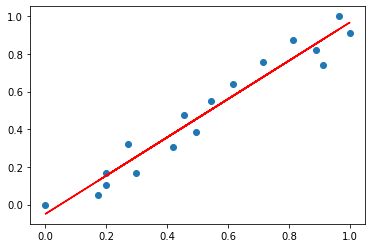

In [62]:
plt.scatter(X_train, y_train)

plt.plot(X_train, -0.04950975977223304 + 1.016505 * X_train, 'r')

plt.show()

## 5. Residual Analysis on Training Data

1. Distribution of the Residuals - Distribution should be normal (Gaussian) with Zero Mean.
2. Check for patterns in Residuals - There should exist no pattern
3. Homoscedasticity - The variance of residual is the same for any value of X

In [63]:
y_train_pred = regressor.predict(X_train)

<AxesSubplot:xlabel='Scores', ylabel='Density'>

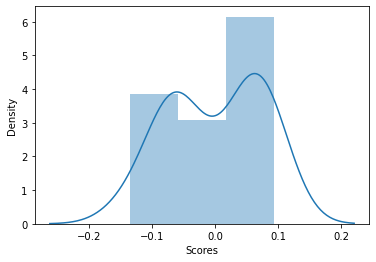

In [64]:
residual = y_train - y_train_pred

sns.distplot(residual)

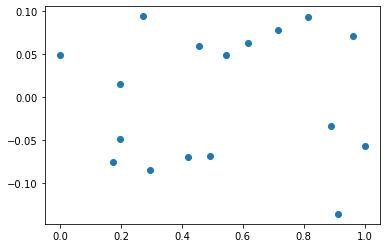

In [65]:
plt.scatter(X_train,residual)

plt.show()

## 6. Making the Prediction

In [66]:
num_features = ['Hours', 'Scores']

norm_test_data = rescale.transform(df_test.loc[:,num_features])

print(norm_test_data.shape, type(norm_test_data))

(8, 2) <class 'numpy.ndarray'>


In [67]:
df_test = pd.DataFrame(norm_test_data, columns = num_features)

df_test.head()

,Hours,Scores
0,0.049383,0.038462
1,0.259259,0.128205
2,0.777778,0.666667
3,0.172840,0.166667
4,0.592593,0.576923


In [68]:
y_test = df_test.pop('Scores')
X_test = df_test

In [69]:
y_test_pred = regressor.predict(X_test)

In [70]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
temp_df

,Actual,Predicted
0,0.038462,0.000688
1,0.128205,0.214029
2,0.666667,0.741105
3,0.166667,0.126182
4,0.576923,0.552864
5,0.230769,0.289325
6,0.089744,0.050886
7,0.884615,0.791303


## 7. Evaluating the Algorithm

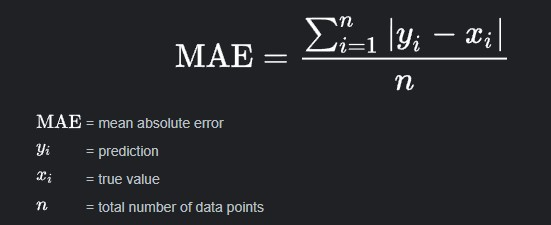

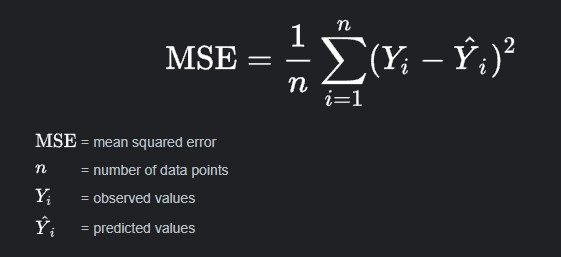  


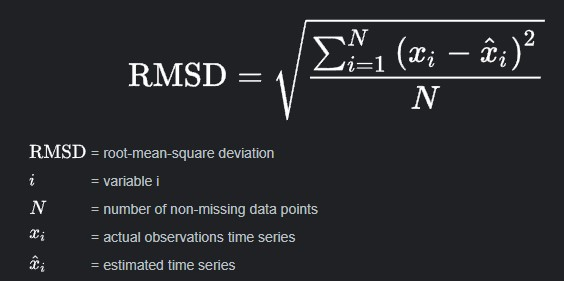

In [72]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  0.05666317702599549
Mean Squared Error:  0.0037746708107660072
Root Mean Squared Error:  0.0614383496748245


In [86]:
print(metrics.r2_score(y_test, y_test_pred))
#R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 1 scale.
#1 means perfect fit and its vice versa for 0

0.9568211104435258


## Model Building using statsmodels

Below mentioned are the generic steps for model building using statsmodels

1. Load the data
2. Understand and Viz the data
3. Data Preparation - train-test Split, Normalisation or Rescaling
4. Training the Model using statsmodels
5. Residual Analysis on Training Data
6. Prediction
7. Evaluation

## 1. Load the Data

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
df = pd.read_csv('student_scores.csv')

## 3. Data Preparation

In [77]:
# Train test split

from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, train_size=0.7, \
                                                    random_state=0)

print(df_train.shape)
print(df_test.shape)

(17, 2)
(8, 2)


In [78]:
# Normalize the data

from sklearn.preprocessing import MinMaxScaler

rescale = MinMaxScaler()

num_features = ['Hours', 'Scores']

norm_train_data = rescale.fit_transform(df_train.loc[:,num_features])

print(norm_train_data.shape, type(norm_train_data))

(17, 2) <class 'numpy.ndarray'>


In [79]:
df_train = pd.DataFrame(norm_train_data, columns = num_features)

df_train.head()

,Hours,Scores
0,0.716049,0.756410
1,0.000000,0.000000
2,0.493827,0.384615
3,0.814815,0.871795
4,0.271605,0.320513


In [80]:
y_train = df_train.pop('Scores')
X_train = df_train

## 4. Building the Model using statsmodels

In [81]:
import statsmodels.api as sm

In [82]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [83]:
lr.params

const   -0.049510
Hours    1.016505
dtype: float64

In [84]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                 Scores   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     276.3
Date:                Sun, 28 Aug 2022   Prob (F-statistic):           4.52e-11
Time:                        11:36:38   Log-Likelihood:                 20.571
No. Observations:                  17   AIC:                            -37.14
Df Residuals:                      15   BIC:                            -35.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0495      0.037     -1.330      0.2

**Understanding the above Statistical Summary about the model**

We are interested in below mentioned values:

1. The coefficient and its p-value
2. R - Square value
3. p - value of F Statistics

**1. The coefficient of Hours is 1.0165 and its p - value is 0.000**

This means the coefficient is statistically significant.

**2. R - Square value is 0.948**

i.e. 94.8 % variance in Scores is explained by Hours

**3. Observe that F - Statistics has a very low p - value**

This means that the complete model is statistically significant.

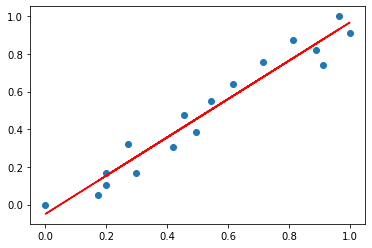

In [85]:
plt.scatter(X_train, y_train)

plt.plot(X_train, -0.0495 + 1.0165 * X_train, 'r')

plt.show()

## 5. Residual Analysis
## 6. Prediction
## 7. Evaluation